In [3]:
import pandas as pd
import os
import glob
import numpy as np
import re

# Merge data of all dataset for training

In [ ]:
# Load the data from CSV files
path1 = '100m_data/india/ndvi/india_landsat_merged.csv' # India data 100m
path2 = '100m_data/china/ndvi/china_landsat_merged.csv' # China data 100m
path3 = '1km_data/vn_points/ndvi/vn_landsat_merged.csv' # Vietnam data 1km
path4 = '1km_global_data/india/ndvi/india1km_landsat_merged.csv' # India data 1km
path5 = '1km_global_data/china/ndvi/china1km_landsat_merged.csv' # China data 1km

data1 = pd.read_csv(path1)
data2 = pd.read_csv(path2)
data3 = pd.read_csv(path3)
data4 = pd.read_csv(path4)
data5 = pd.read_csv(path5)                                                 

print(f"The number of rows in india 100m: {len(data1)}") 
print(f"The number of rows in china 100m: {len(data2)}")                                
print(f"The number of rows in vietnam 1km: {len(data3)}")                                
print(f"The number of rows in india 1km: {len(data4)}")                                
print(f"The number of rows in china 1km: {len(data5)}") 

data_100 = pd.concat([data1, data2], axis = 0)
# Do not need to add location noise to the 100m data
# for col in ['12', '13', '14']:
#     noise = np.random.normal(loc = 0.0, scale = 0.1, size = len(data_100))
#     data_100[col] = np.clip(data_100[col] + noise, 0, 1)

data = pd.concat([data_100, data3, data4, data5], axis = 0)
data['s_index'] = range(1, len(data) + 1)
data.to_csv('/mnt/data2tb/Transfer-DenseSM-E_pack/fusion/delete_this.csv', index = False)

The number of rows in india 100m: 37467
The number of rows in china 100m: 19971
The number of rows in vietnam 1km: 98431
The number of rows in india 1km: 3004
The number of rows in china 1km: 3901
The number of rows in vietnam 1km 2020: 71226
The number of rows in india 1km 2020: 498
The number of rows in china 1km 2020: 1919


#### Balance Data for better training

In [ ]:
df = data[(data['sm'] >= 0.1) & (data['sm'] <= 0.7)]

# Balance the data based on soil moisture (sm) values, we split the data into three categories: <= 0.3, 0.3 < sm < 0.4, and >= 0.4
central_mask = (df['sm'] >= 0.3) & (df['sm'] <= 0.4)
low_mask = df['sm'] < 0.3 
high_mask = df['sm'] > 0.4

# Keep 50% of the low (<= 0.3) and high (>=0.4) soil moisture samples, and all central samples
df_central = df[central_mask]
df_low = df[low_mask].sample(frac = 0.5, random_state = 42)
df_hight = df[high_mask].sample(frac = 0.5, random_state = 42)

# After balancing, we concatenate the three dataframes
df_balanced = pd.concat([df_central, df_low, df_hight], axis = 0).reset_index(drop = True)
# Save the balanced dataframe to a CSV file
df_balanced.to_csv('/mnt/data2tb/Transfer-DenseSM-E_pack/fusion/balanced_deletethis.csv', index = False)

#### Visualize the data

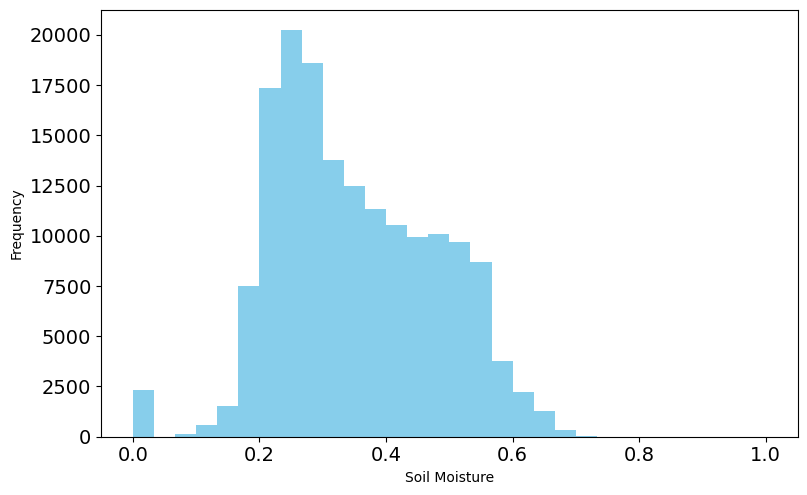

In [10]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (8,5))
plt.hist(data['sm'].dropna(), bins = 30, range = (0, 1.0), color = 'skyblue')
plt.xlabel('Soil Moisture')
plt.ylabel('Frequency')
# plt.title('Distribution of SMAP VN soil moisture', fontsize = 20)
plt.tight_layout()
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.show()

# Concatenate file of locations to a merged file

In [ ]:
# Directory containing the CSV files data, they are outputs from data_pre/Prepare_samples.ipynb
input_dir = '1km_global_data/india/ndvi/output_india_landsat'
# File path for the merged output 
output_path = '1km_global_data/india/ndvi/india1km_merged.csv'

# Load all CSV files of all sites the region (network)
files = os.listdir(input_dir)
print(len(files))

network = 'INDIA_1km'
# Initialize list to store DataFrames
df_list = []

# Traverse through each file in the directory
for file in files:
    station = file.split('.')[0]

    # Read CSV
    df = pd.read_csv(os.path.join(input_dir, file))

    if df.columns[0] in [None, '', 'Unnamed: 0']:
        df = df.iloc[:, 1:] # drop the first column

    df = df.dropna()

    # Insert 'network' and 'station' columns at the beginning
    df.insert(0, 'network', network)
    df.insert(1, 'station', station)
    # print(len(df))
    df_list.append(df)

print(len(df_list))
merged_df = pd.concat(df_list, ignore_index= True)

merged_df.insert(0, 's_index', range(1, len(merged_df)+1))

# Save to a single csv file
merged_df.to_csv(output_path, index=False)
print(len(merged_df))


597
597
3004
